# <font color='red'>Setting up</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import openpyxl

from scipy import stats

from pandas.plotting import scatter_matrix
from pylab import rcParams
import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.inspection import permutation_importance
from rfpimp import *
import imblearn
from imblearn.over_sampling import SMOTE
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from collections import defaultdict
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
pd.set_option("display.max_columns",100)
from autogluon.tabular import TabularDataset, TabularPredictor
import shap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [15]:
#! pip install yellowbrick

     -------------------------------------- 274.2/274.2 kB 8.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data preparation

In [2]:
df = pd.read_csv('trucking factors only (wo TSF).csv')

# <font color='red'>K-means Clustering</font>

In [8]:
# '''
# Result summary:
# For 6-factor
#         Silhouette    DBI    No.of cluster
# k-means 0.409         1.00   2
# DBSCAN  0.197         2.4    2
# For 7-factor
#         Silhouette    DBI    No.of cluster
# k-means 0.239         1.69   2
# DBSCAN  0.255         1.14   2
# '''

## k-means, 6-factor
- we won't use elbow method; instead use the indicators like SI, DBI etc to justify that k=2 is good
- we are essentially trying to split workers into 2 groups: positive perception vs negative perception

### Elbow method below suggests n_cluster=3 is suitable

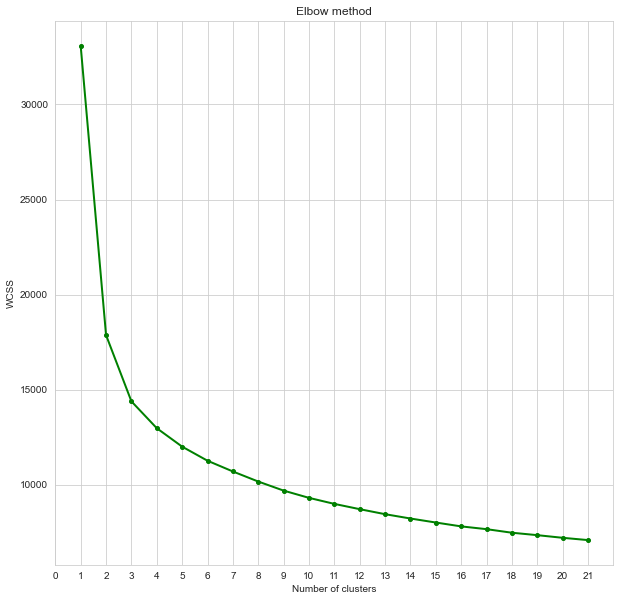

In [16]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
def elbow_plot(X):   
    # find the optimal number of clusters using elbow method
    WCSS = []
    for i in range(1,22):
        model = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
        model.fit(X)
        WCSS.append(model.inertia_)
    
    fig = plt.figure(figsize = (10, 10))
    plt.plot(range(1, 22), WCSS, linewidth = 2, markersize = 4, marker='o', color = 'green')
    plt.xticks(np.arange(22))
    plt.title("Elbow method")
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    plt.show()
elbow_plot(X)

### YellowBrick  Elbow Search Approach

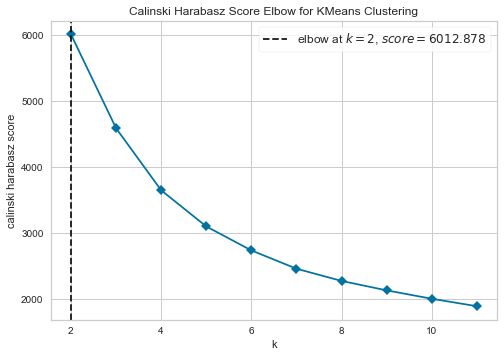

In [17]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

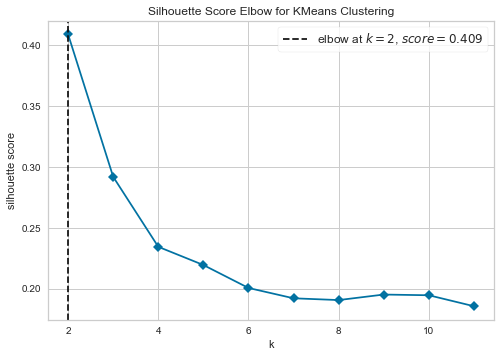

In [18]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

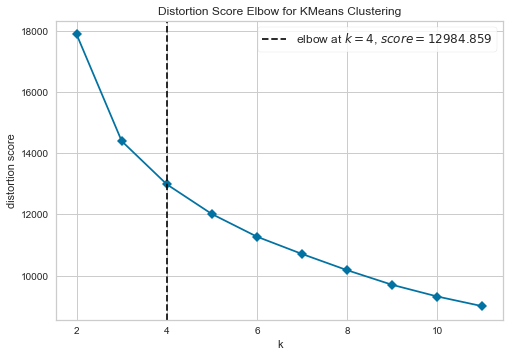

In [19]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Validate with silhouette score below. Performance when n_cluster=2 is ok-ish (0.4)

For n_clusters = 2 The average silhouette_score is : 0.40863935950374425
For n_clusters = 3 The average silhouette_score is : 0.29170674120127804
For n_clusters = 4 The average silhouette_score is : 0.23303516273777364
For n_clusters = 5 The average silhouette_score is : 0.21968858791288237
For n_clusters = 6 The average silhouette_score is : 0.19651667984251417
For n_clusters = 7 The average silhouette_score is : 0.19290276333825104
For n_clusters = 8 The average silhouette_score is : 0.1924448982101868
For n_clusters = 9 The average silhouette_score is : 0.1953246615391609


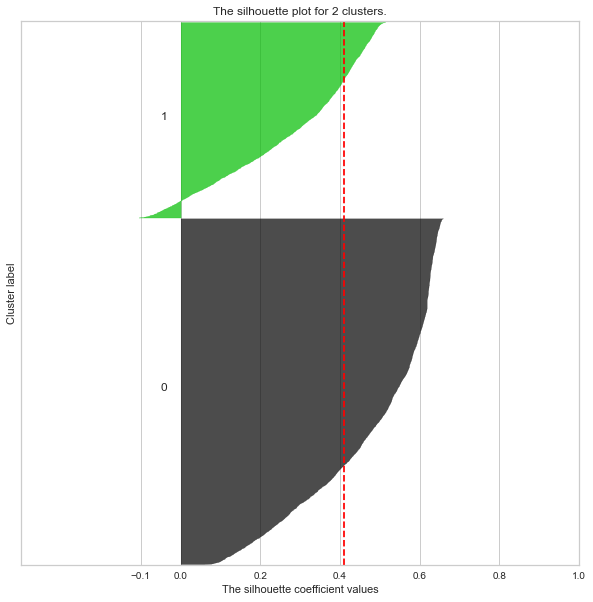

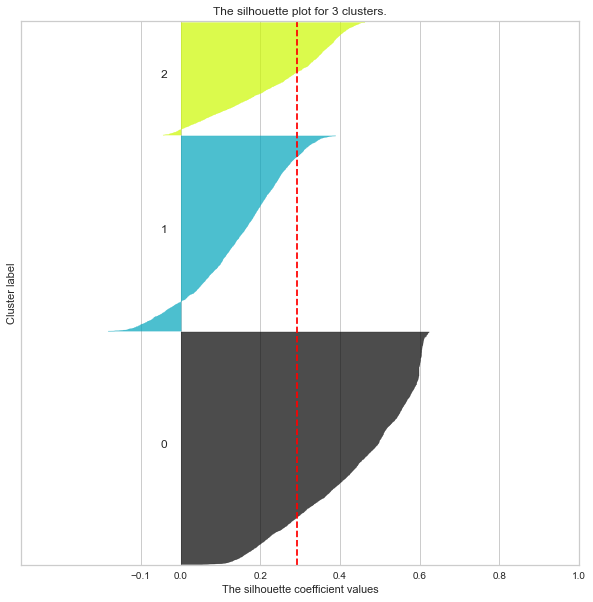

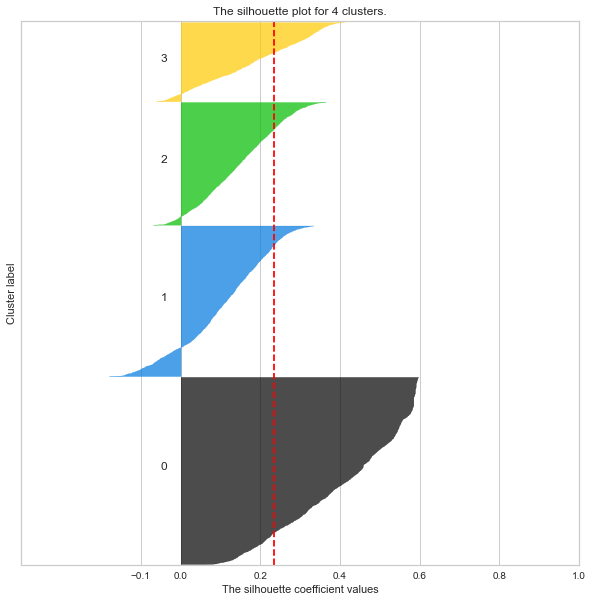

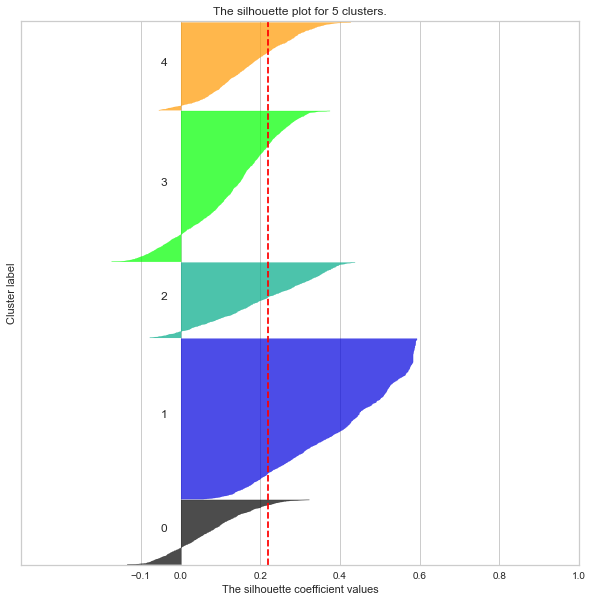

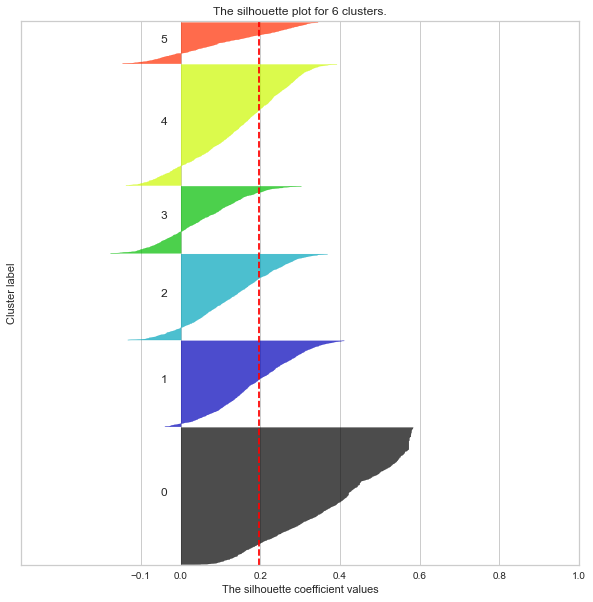

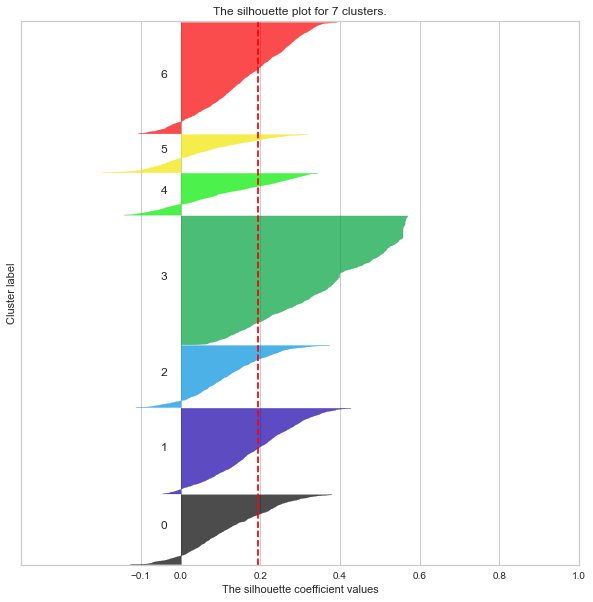

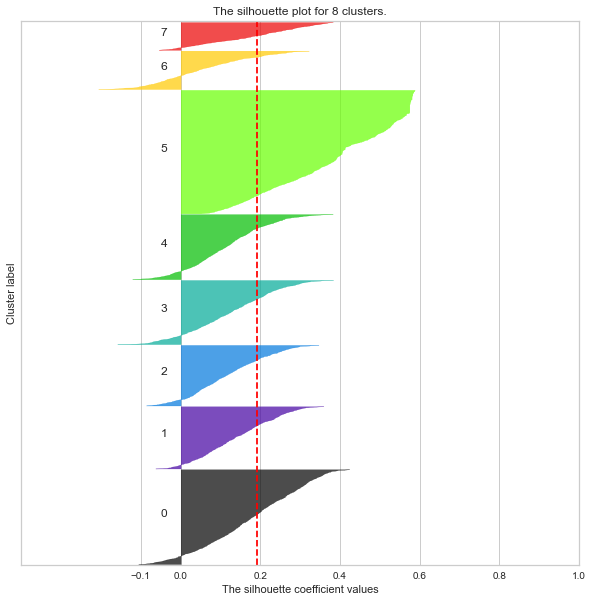

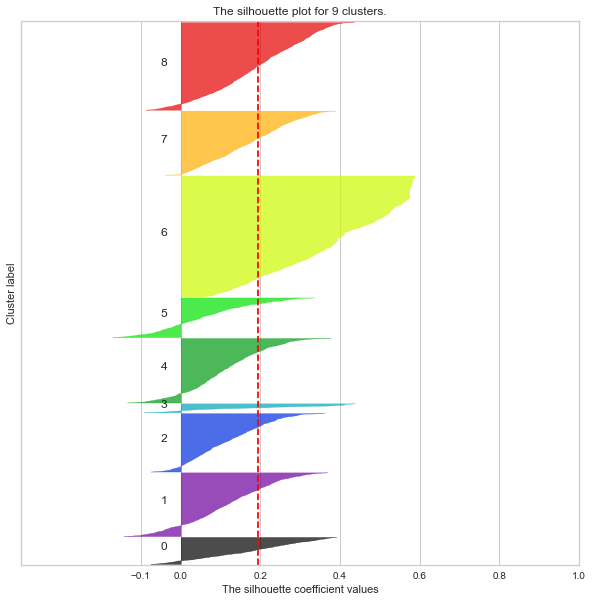

In [20]:
def silhouette_plot(X):
    for n_clusters in range(2, 10):
        df = pd.read_csv('trucking factors only (wo TSF).csv')
        X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
        fig = plt.figure(figsize = (10, 10))
        ax1 = fig.add_subplot(111)
        ax1.set_xlim([-0.4, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state=0)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

    #         print(ith_cluster_silhouette_values)
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for {} clusters.".format(n_clusters))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()
silhouette_plot(X)

### Validate with DBI below. Performance when n_cluster=2 is comparatively ok (1.00)

In [21]:
#smaller the value, the better. smallest value is 0
def calculate_davies_bouldin(X):
    for i in range(2, 10):
        df = pd.read_csv('trucking factors only (wo TSF).csv')
        X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
        model = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
        labels = model.fit_predict(X)
        db_index = davies_bouldin_score(X, labels)
        print("For n_clusters = {}, Davies-Bouldin Index is {}". format(i, db_index))
    
calculate_davies_bouldin(X)

For n_clusters = 2, Davies-Bouldin Index is 1.003013629919546
For n_clusters = 3, Davies-Bouldin Index is 1.2866548325456326
For n_clusters = 4, Davies-Bouldin Index is 1.5627247812745009
For n_clusters = 5, Davies-Bouldin Index is 1.5617638738240807
For n_clusters = 6, Davies-Bouldin Index is 1.603833797989422
For n_clusters = 7, Davies-Bouldin Index is 1.6254062737691048
For n_clusters = 8, Davies-Bouldin Index is 1.6284757133583712
For n_clusters = 9, Davies-Bouldin Index is 1.5551276668255154


# DBSCAN, 6-factor (not as good as k-means)
- It is difficult to justify eps and min_samples; the values change significantly, so it is easier to use k-means; we are essentially trying to group drivers into 2 or more clusters based on their safety climate perceptions, but as k-means is not suitable for non-spherical data, DBSCAN is used to validate the findings from k-means

## Testing on eps

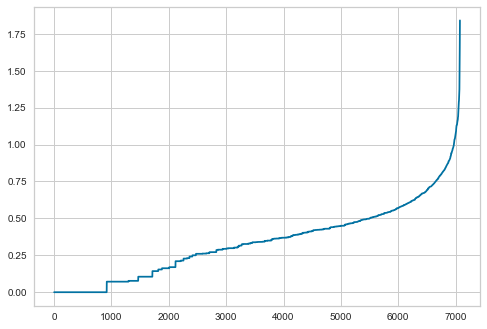

In [42]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
#Below is to plot the graph for determining the eps value. n_neighbors is set to 2*(No. of dimensions). See https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [26]:
! pip install kneed


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


0.7892078251078405


<Figure size 360x360 with 0 Axes>

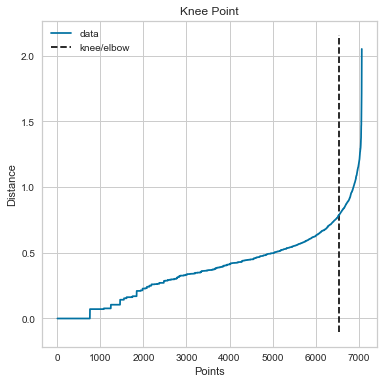

In [57]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,1], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=7, curve='convex', direction='increasing') #interp_method='polynomial'
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

0.9770680342036568


<Figure size 360x360 with 0 Axes>

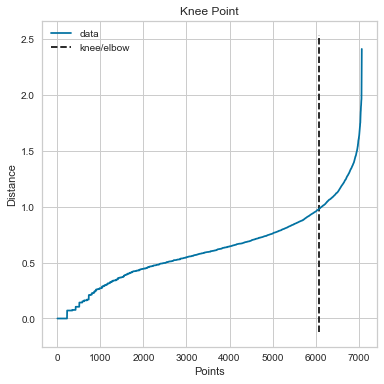

In [31]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=9)
neighbors = nearest_neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,8], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

## The graph shows the eps is around 0.8. Below is the DBSCAN clustering process. min_samples is by defaul 4, but may be increased. In this case, the lowest min_samples value that gives at least two samples is 140 (increased 10 by 10). If min_samples is lower, it returns only one cluster. Use "n_clusters" to check the number of cluster produced. See: https://doi.org/10.1145/3068335

In [59]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
m = DBSCAN(eps=0.8, min_samples=220)
m.fit(X)
labels = m.labels_
#below is to export the labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clusters = [df[labels == i] for i in range(n_clusters_)]
for i in range (len (clusters)):
    clusters[i].to_csv("trucking factors only (wo TSF){}.csv".format(str(i)))

In [61]:
X['cls'] = labels

In [65]:
def label_cls (row):
    if row['cls'] == -1:
        return 0
    if row['cls'] == 0:
        return 1
    
X['cls'] = X.apply (lambda row: label_cls(row), axis=1)

In [68]:
X['cls'].value_counts()

0    3943
1    3132
Name: cls, dtype: int64

## <font color='red'>try with diff eps values</font>
- Based on Tx's analyses, possible eps and min_samples = -->(210,0.75)[result: 1 cls,silhoutte score 0.29, DBI 1.08], (0.797,140), (0.946, 230), (1.11, 15)

In [126]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
m = DBSCAN(eps=0.75, min_samples=210)
m.fit(X)
labels = m.labels_
#below is to export the labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clusters = [df[labels == i] for i in range(n_clusters_)]
for i in range (len (clusters)):
    clusters[i].to_csv("trucking factors only (wo TSF){}.csv".format(str(i)))
print("n_clusters_ = " + str(n_clusters_))
print(clusters)

n_clusters_ = 1
[      acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
6       0  4.500000  3.333333  4.25  4.307692  4.333333   4.5
8       0  4.714286  3.666667  5.00  4.692308  5.000000   5.0
9       0  4.357143  4.666667  5.00  4.384615  3.666667   5.0
11      0  4.857143  4.333333  5.00  4.769231  4.666667   5.0
16      1  4.642857  4.333333  5.00  4.461538  5.000000   5.0
...   ...       ...       ...   ...       ...       ...   ...
7059    0  4.071429  3.000000  5.00  4.384615  4.666667   5.0
7062    0  4.428571  4.333333  4.50  4.692308  5.000000   5.0
7066    0  4.714286  4.000000  5.00  4.923077  5.000000   5.0
7067    0  5.000000  4.333333  5.00  4.846154  5.000000   5.0
7074    0  4.500000  3.666667  4.50  4.153846  4.666667   5.0

[2757 rows x 7 columns]]


In [134]:
df_dbscan_cls = df.drop("acc", axis=1)
df_dbscan_cls['db_cls'] = labels.tolist()

In [135]:
df_dbscan_cls['db_cls'].value_counts()

-1    4318
 0    2757
Name: db_cls, dtype: int64

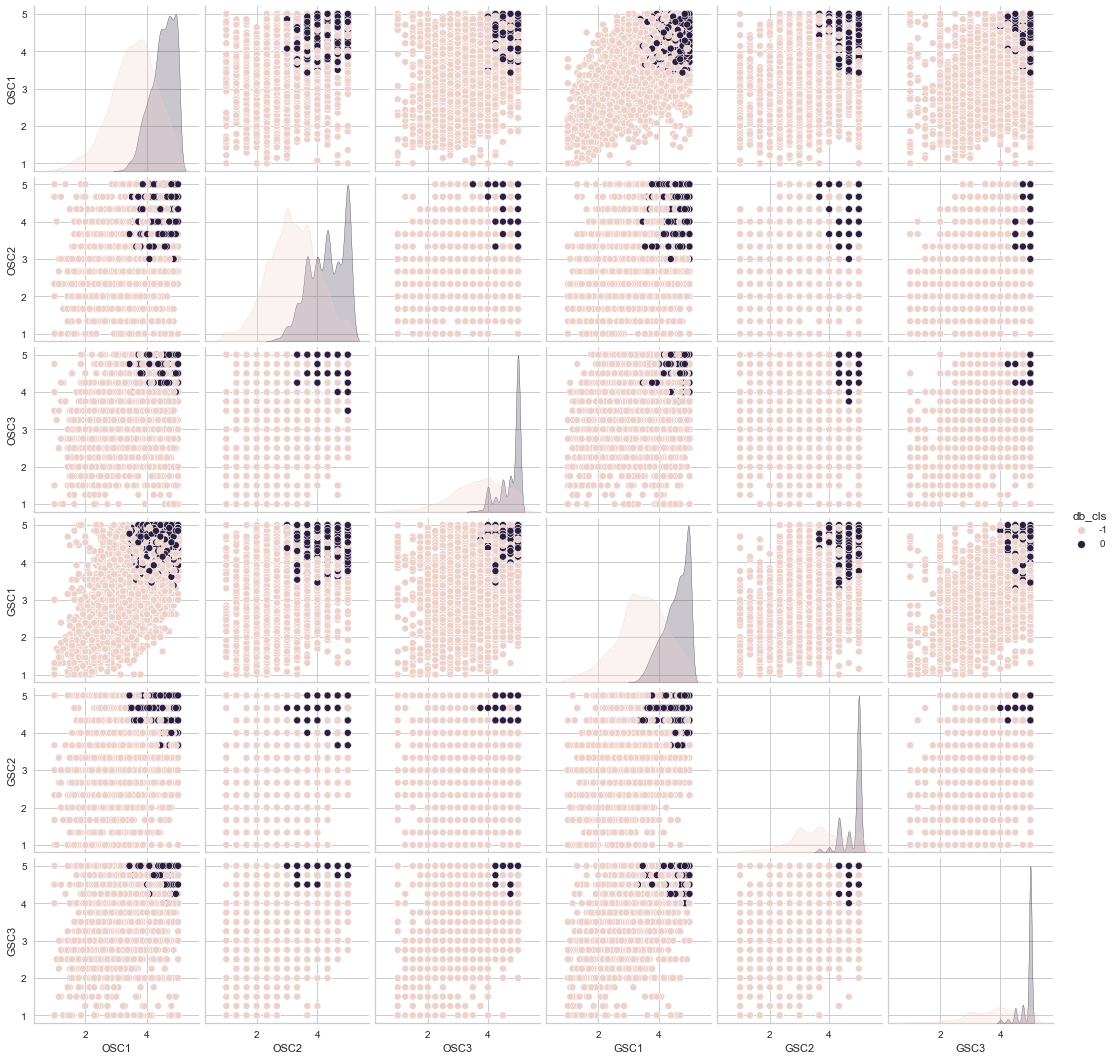

In [136]:
sb.pairplot(df_dbscan_cls, hue="db_cls")

In [137]:
m_labels = m.fit_predict(X)
silhouette_score(X, m_labels)

0.2897621842141334

In [138]:
davies_bouldin_score(X, m_labels)

1.0786087520912468

## <font color='red'>try with diff eps values</font>
- Based on Tx's analyses, possible eps and min_samples = (210,0.75), -->(0.797,140)[result: 2 cls,0.29,1.08], (0.946, 230), (1.11, 15)

In [139]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
m = DBSCAN(eps=0.797, min_samples=140)
m.fit(X)
labels = m.labels_
#below is to export the labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clusters = [df[labels == i] for i in range(n_clusters_)]
for i in range (len (clusters)):
    clusters[i].to_csv("trucking factors only (wo TSF){}.csv".format(str(i)))
print("n_clusters_ = " + str(n_clusters_))
print(clusters)

n_clusters_ = 2
[      acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
1       0  4.071429  4.333333  5.00  4.000000  4.333333  4.00
2       0  3.857143  3.333333  3.50  4.000000  3.666667  3.25
5       0  4.857143  3.000000  5.00  3.923077  4.333333  5.00
6       0  4.500000  3.333333  4.25  4.307692  4.333333  4.50
7       1  4.142857  4.000000  4.50  3.846154  4.000000  4.25
...   ...       ...       ...   ...       ...       ...   ...
7061    0  3.428571  3.000000  3.75  3.461538  4.000000  4.00
7062    0  4.428571  4.333333  4.50  4.692308  5.000000  5.00
7066    0  4.714286  4.000000  5.00  4.923077  5.000000  5.00
7067    0  5.000000  4.333333  5.00  4.846154  5.000000  5.00
7074    0  4.500000  3.666667  4.50  4.153846  4.666667  5.00

[3948 rows x 7 columns],       acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
0       0  3.071429  3.000000  3.75  3.307692  3.666667  3.00
3       0  3.142857  3.000000  3.00  3.461538  3.333333  3.75
20      0  3.000000  2.6666

In [140]:
df_dbscan_cls = df.drop("acc", axis=1)
df_dbscan_cls['db_cls'] = labels.tolist()

In [141]:
df_dbscan_cls['db_cls'].value_counts()

 0    3948
-1    2771
 1     356
Name: db_cls, dtype: int64

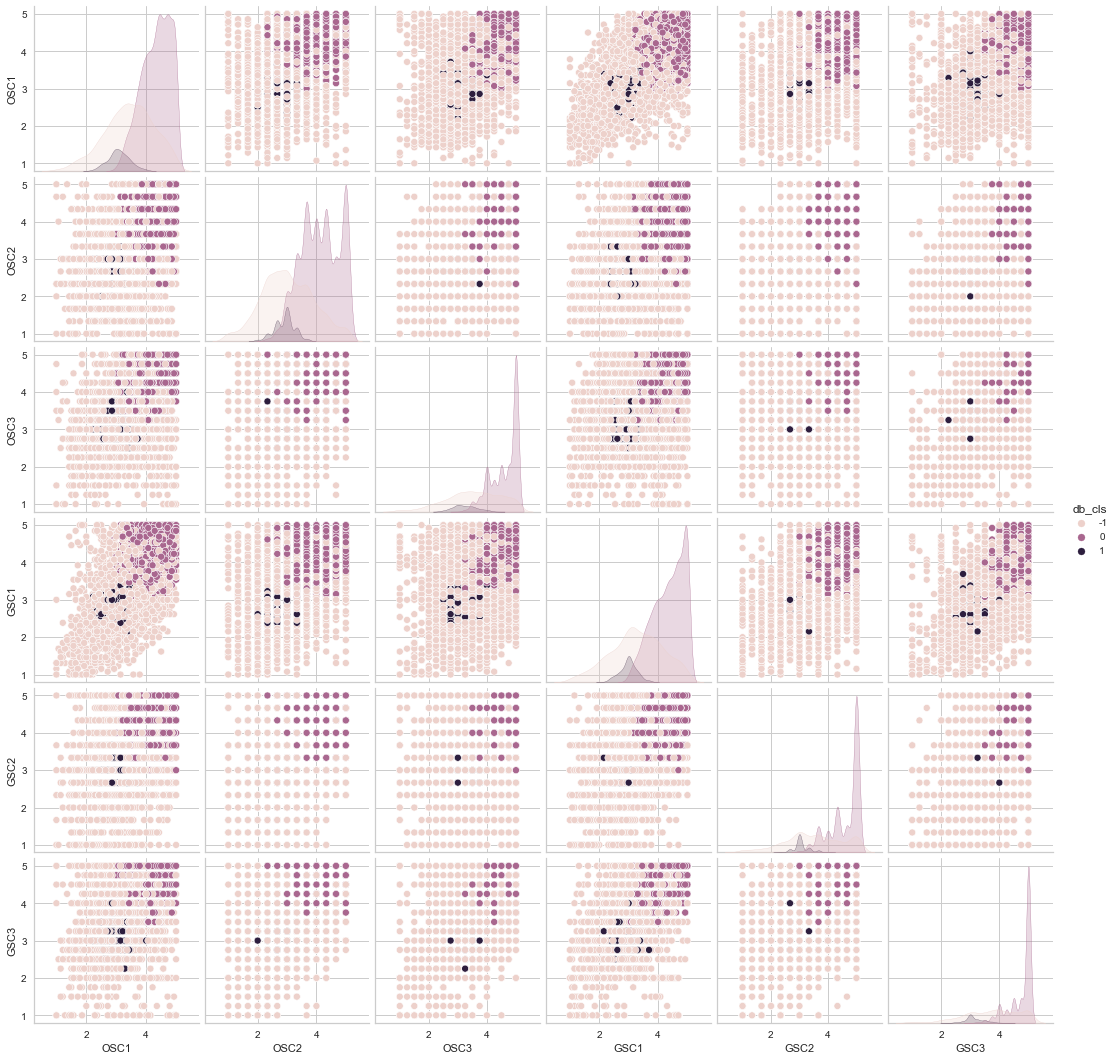

In [142]:
sb.pairplot(df_dbscan_cls, hue="db_cls")

In [137]:
m_labels = m.fit_predict(X)
silhouette_score(X, m_labels)

0.2897621842141334

In [138]:
davies_bouldin_score(X, m_labels)

1.0786087520912468

## <font color='red'>try with diff eps values</font>
- Based on Tx's analyses, possible eps and min_samples = (210,0.75), (0.797,140), -->(0.946, 230)[result: 1 cls,0.28,1.6], (1.11, 15)

In [145]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
m = DBSCAN(eps=0.946, min_samples=230)
m.fit(X)
labels = m.labels_
#below is to export the labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clusters = [df[labels == i] for i in range(n_clusters_)]
for i in range (len (clusters)):
    clusters[i].to_csv("trucking factors only (wo TSF){}.csv".format(str(i)))
print("n_clusters_ = " + str(n_clusters_))
print(clusters)

n_clusters_ = 1
[      acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
0       0  3.071429  3.000000  3.75  3.307692  3.666667  3.00
1       0  4.071429  4.333333  5.00  4.000000  4.333333  4.00
2       0  3.857143  3.333333  3.50  4.000000  3.666667  3.25
3       0  3.142857  3.000000  3.00  3.461538  3.333333  3.75
5       0  4.857143  3.000000  5.00  3.923077  4.333333  5.00
...   ...       ...       ...   ...       ...       ...   ...
7067    0  5.000000  4.333333  5.00  4.846154  5.000000  5.00
7068    0  3.714286  3.333333  4.00  3.153846  5.000000  3.50
7071    0  3.428571  2.666667  4.50  3.615385  3.000000  3.75
7072    0  3.214286  3.666667  4.75  3.230769  3.666667  4.75
7074    0  4.500000  3.666667  4.50  4.153846  4.666667  5.00

[5121 rows x 7 columns]]


In [146]:
df_dbscan_cls = df.drop("acc", axis=1)
df_dbscan_cls['db_cls'] = labels.tolist()

In [147]:
df_dbscan_cls['db_cls'].value_counts()

 0    5121
-1    1954
Name: db_cls, dtype: int64

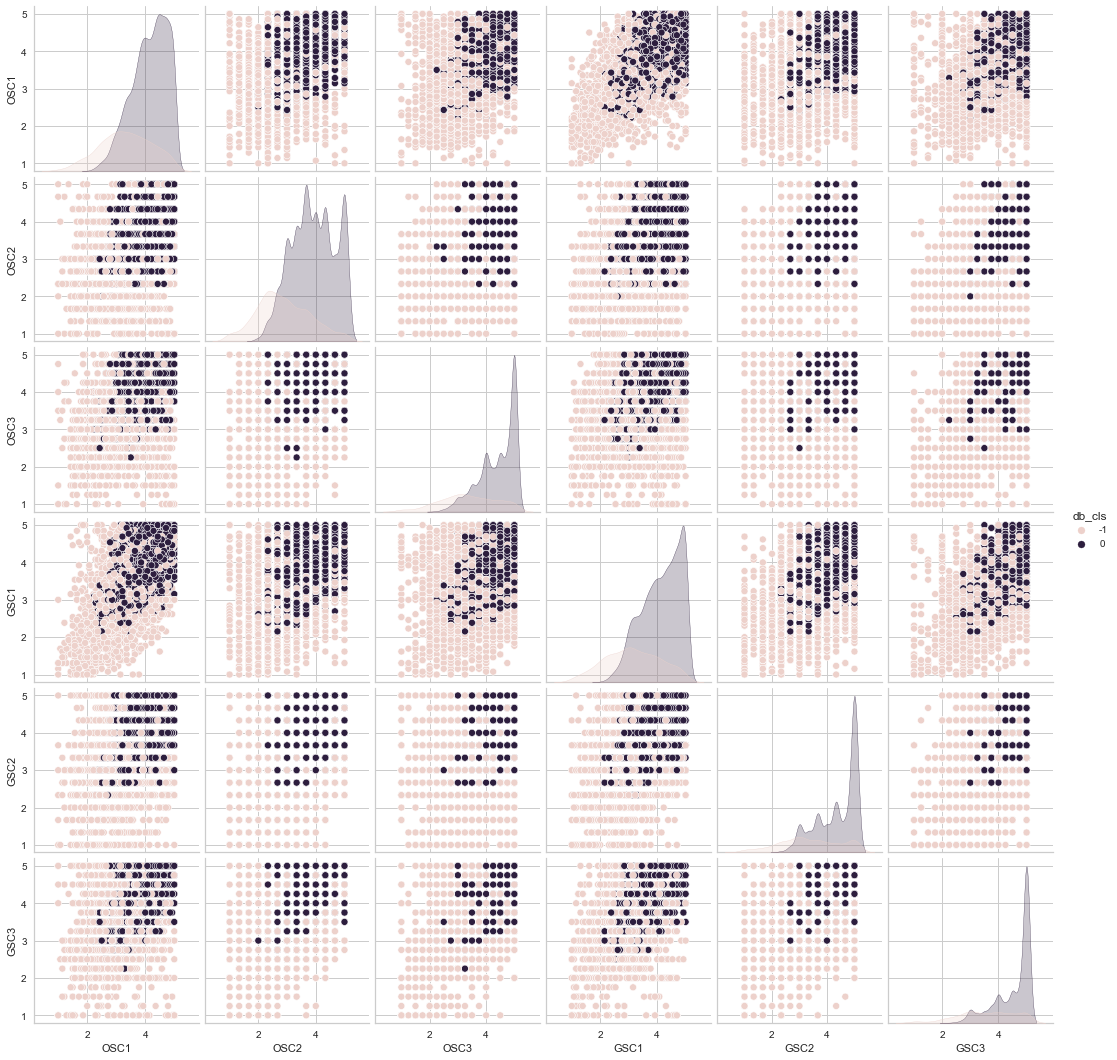

In [148]:
sb.pairplot(df_dbscan_cls, hue="db_cls")

In [149]:
m_labels = m.fit_predict(X)
silhouette_score(X, m_labels)

0.2814465062940874

In [150]:
davies_bouldin_score(X, m_labels)

1.5987937227895737

## <font color='red'>try with diff eps values</font>
- Based on Tx's analyses, possible eps and min_samples = (210,0.75), (0.797,140), (0.946, 230), -->(1.11, 15)[result: 2cls,0.39,1.44]

In [151]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
m = DBSCAN(eps=1.11, min_samples=15)
m.fit(X)
labels = m.labels_
#below is to export the labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clusters = [df[labels == i] for i in range(n_clusters_)]
for i in range (len (clusters)):
    clusters[i].to_csv("trucking factors only (wo TSF){}.csv".format(str(i)))
print("n_clusters_ = " + str(n_clusters_))
print(clusters)

n_clusters_ = 2
[      acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
0       0  3.071429  3.000000  3.75  3.307692  3.666667  3.00
1       0  4.071429  4.333333  5.00  4.000000  4.333333  4.00
2       0  3.857143  3.333333  3.50  4.000000  3.666667  3.25
3       0  3.142857  3.000000  3.00  3.461538  3.333333  3.75
4       0  4.785714  5.000000  2.50  4.538462  4.333333  5.00
...   ...       ...       ...   ...       ...       ...   ...
7069    0  4.428571  4.666667  3.75  4.307692  4.333333  3.50
7071    0  3.428571  2.666667  4.50  3.615385  3.000000  3.75
7072    0  3.214286  3.666667  4.75  3.230769  3.666667  4.75
7073    0  2.785714  3.000000  4.00  3.153846  4.333333  4.75
7074    0  4.500000  3.666667  4.50  4.153846  4.666667  5.00

[6868 rows x 7 columns],       acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
45      1  4.357143  1.333333  2.00  4.307692  2.666667  1.25
115     1  5.000000  1.000000  1.00  4.692308  2.333333  1.00
130     0  5.000000  1.0000

In [152]:
df_dbscan_cls = df.drop("acc", axis=1)
df_dbscan_cls['db_cls'] = labels.tolist()

In [153]:
df_dbscan_cls['db_cls'].value_counts()

 0    6868
-1     190
 1      17
Name: db_cls, dtype: int64

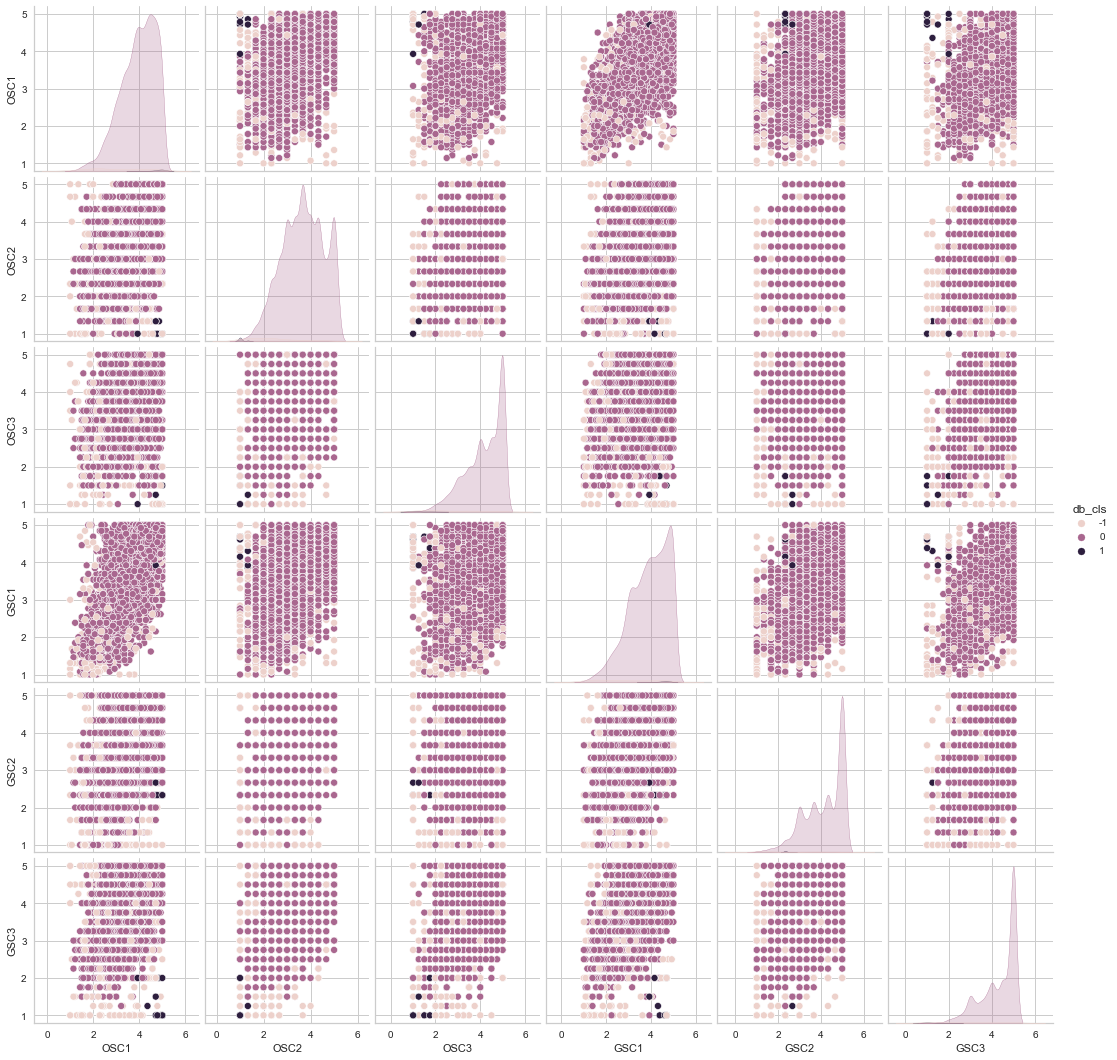

In [154]:
sb.pairplot(df_dbscan_cls, hue="db_cls")

In [155]:
m_labels = m.fit_predict(X)
silhouette_score(X, m_labels)

0.38672394138973853

In [156]:
davies_bouldin_score(X, m_labels)

1.4368288051862148

# Predicting clusters

## k-means

In [180]:
# 1. get a dataset with all the clusters for each row
# 2. make cluster the target variable
# 3. Autogluon to find the best model for predicting cluster
# 4. Determine importance of features

df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
model = KMeans(n_clusters = 2, init = 'k-means++', random_state=0)
model.fit(X)
y_kmeans = model.predict(X)

In [181]:
#count = np.count_nonzero(y_kmeans)
count0 = np.count_nonzero(y_kmeans==0)
count1 = np.count_nonzero(y_kmeans==1)
print("0 = " + str(count0))
print("1 = " + str(count1))

0 = 4519
1 = 2556


In [182]:
y = y_kmeans.tolist()
pd.DataFrame(y)

0
0     1
1     0
2     1
3     1
4     0
...  ..
7070  1
7071  1
7072  0
7073  1
7074  0

[7075 rows x 1 columns]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
oversample = SMOTE(random_state=1919)
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [184]:
df_test = X_test
df_test['cls'] = y_test
test_data = df_test
df_test.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  2123.000000  2123.000000  2123.000000  2123.000000  2123.000000   
mean      3.906231     3.642644     4.099034     3.851516     4.098132   
std       0.799553     0.921008     0.893311     0.883873     0.946938   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.428571     3.000000     3.500000     3.307692     3.333333   
50%       4.000000     3.666667     4.250000     4.000000     4.333333   
75%       4.571429     4.333333     5.000000     4.615385     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3          cls  
count  2123.000000  2123.000000  
mean      4.251884     0.362223  
std       0.871178     0.480756  
min       1.000000     0.000000  
25%       3.750000     0.000000  
50%       4.500000     0.000000  
75%       5.000000     1.000000  
max       5.000000     1.000000

In [185]:
test_data['cls'].value_counts()

0    1354
1     769
Name: cls, dtype: int64

In [186]:
df_sm=X_train_sm
df_sm['cls']=y_train_sm
train_data = df_sm
df_sm.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  6330.000000  6330.000000  6330.000000  6330.000000  6330.000000   
mean      3.764724     3.463628     3.965522     3.677400     3.894282   
std       0.807450     0.922066     0.907272     0.916372     0.997195   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.214286     2.874242     3.250000     3.009942     3.000000   
50%       3.857143     3.333333     4.000000     3.742468     4.000000   
75%       4.428571     4.000000     4.750000     4.461538     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3          cls  
count  6330.000000  6330.000000  
mean      4.097646     0.500000  
std       0.907841     0.500039  
min       1.000000     0.000000  
25%       3.500000     0.000000  
50%       4.250000     0.500000  
75%       5.000000     1.000000  
max       5.000000     1.000000

In [187]:
#select model based on f1
label = 'cls'
save_path = 'agModels-predictCluster_220802'  
predictor = TabularPredictor(label=label, path=save_path,eval_metric="f1").fit(train_data, presets='best_quality')

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictCluster_220802\"
AutoGluon Version:  0.5.1
Python Version:     3.8.5
Operating System:   Windows
Train Data Rows:    6330
Train Data Columns: 6
Label Column: cls
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1840.57 MB
	Train Data (Original)  Memory Usage: 0.3 MB (0.0% of available memor

In [188]:
# Libraries/Modules import conventions
import bokeh

results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.999368       0.552560  64.809048                0.010971           4.595500            2       True         14
1     NeuralNetTorch_BAG_L1   0.999053       0.260283  31.572424                0.260283          31.572424            1       True         12
2    NeuralNetFastAI_BAG_L1   0.998420       0.281306  28.641125                0.281306          28.641125            1       True         10
3         LightGBMXT_BAG_L1   0.994491       0.178494  12.510505                0.178494          12.510505            1       True          3
4           CatBoost_BAG_L1   0.992583       0.094689  23.146883                0.094689          23.146883            1       True          7
5            XGBoost_BAG_L1   0.991332       0.078786  10.664317                

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


In [189]:
predictor.evaluate(test_data)

Evaluation: f1 on test data: 0.996746909564086
Evaluations on test data:
{
    "f1": 0.996746909564086,
    "accuracy": 0.9976448422044277,
    "balanced_accuracy": 0.9973108623872242,
    "mcc": 0.9949017285707431,
    "roc_auc": 0.9999875147182264,
    "precision": 0.9973958333333334,
    "recall": 0.9960988296488946
}


{'f1': 0.996746909564086,
 'accuracy': 0.9976448422044277,
 'balanced_accuracy': 0.9973108623872242,
 'mcc': 0.9949017285707431,
 'roc_auc': 0.9999875147182264,
 'precision': 0.9973958333333334,
 'recall': 0.9960988296488946}

In [190]:
predictor.predict_proba(test_data)

0             1
1091  1.000000  7.199053e-08
6217  0.000052  9.999484e-01
4737  0.979810  2.018967e-02
878   0.989104  1.089637e-02
4382  0.999982  1.831331e-05
...        ...           ...
6611  1.000000  2.536707e-07
6791  0.999995  5.070528e-06
7048  0.000000  1.000000e+00
4466  0.999999  7.416362e-07
1231  0.999995  5.249932e-06

[2123 rows x 2 columns]

In [191]:
predictor.get_model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'XGBoost_BAG_L1',
 'NeuralNetTorch_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2']

In [192]:
predictor.feature_importance(test_data, num_shuffle_sets=100, subsample_size = 6000)

Computing feature importance via permutation shuffling for 6 features using 2123 rows with 100 shuffle sets...
	514.52s	= Expected runtime (5.15s per shuffle set)
	194.9s	= Actual runtime (Completed 100 of 100 shuffle sets)


importance    stddev        p_value    n  p99_high   p99_low
GSC2    0.124499  0.007226  8.419915e-125  100  0.126396  0.122601
GSC3    0.103403  0.007118  1.696776e-117  100  0.105272  0.101533
GSC1    0.093394  0.005787  5.313820e-122  100  0.094914  0.091874
OSC2    0.091063  0.005600  2.517078e-122  100  0.092534  0.089592
OSC3    0.087041  0.005417  8.258229e-122  100  0.088464  0.085619
OSC1    0.068811  0.005534  7.620385e-111  100  0.070265  0.067358

In [83]:
predictor.feature_importance(test_data, num_shuffle_sets=20, subsample_size = 6000, model = 'NeuralNetTorch_BAG_L1')

Computing feature importance via permutation shuffling for 6 features using 2123 rows with 20 shuffle sets...
	48.03s	= Expected runtime (2.4s per shuffle set)
	17.95s	= Actual runtime (Completed 20 of 20 shuffle sets)


importance    stddev       p_value   n  p99_high   p99_low
GSC2    0.126338  0.007553  3.063444e-25  20  0.131170  0.121506
GSC3    0.103173  0.006375  5.717637e-25  20  0.107251  0.099095
GSC1    0.094727  0.006510  4.276085e-24  20  0.098892  0.090563
OSC2    0.093830  0.006685  8.472178e-24  20  0.098107  0.089554
OSC3    0.089135  0.005417  4.177361e-25  20  0.092600  0.085670
OSC1    0.070670  0.006277  5.453426e-22  20  0.074685  0.066654

## charts and analyses to understand clusters

In [84]:
X['cls']=y_kmeans
X.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  7075.000000  7075.000000  7075.000000  7075.000000  7075.000000   
mean      3.914629     3.625677     4.115053     3.857624     4.093098   
std       0.785477     0.922763     0.881243     0.884471     0.951236   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.428571     3.000000     3.500000     3.230769     3.333333   
50%       4.000000     3.666667     4.250000     4.000000     4.333333   
75%       4.571429     4.333333     5.000000     4.615385     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3          cls  
count  7075.000000  7075.000000  
mean      4.275124     0.361272  
std       0.862117     0.480403  
min       1.000000     0.000000  
25%       3.750000     0.000000  
50%       4.500000     0.000000  
75%       5.000000     1.000000  
max       5.000000     1.000000

In [88]:
X['acc']=df['acc']
X.corr()

OSC1      OSC2      OSC3      GSC1      GSC2      GSC3       cls  \
OSC1  1.000000  0.591893  0.577101  0.728083  0.536533  0.579359 -0.656397   
OSC2  0.591893  1.000000  0.562000  0.567202  0.508305  0.544794 -0.625414   
OSC3  0.577101  0.562000  1.000000  0.516029  0.477137  0.627246 -0.638216   
GSC1  0.728083  0.567202  0.516029  1.000000  0.625539  0.694422 -0.703857   
GSC2  0.536533  0.508305  0.477137  0.625539  1.000000  0.664550 -0.695701   
GSC3  0.579359  0.544794  0.627246  0.694422  0.664550  1.000000 -0.740569   
cls  -0.656397 -0.625414 -0.638216 -0.703857 -0.695701 -0.740569  1.000000   
acc  -0.017741 -0.019976 -0.003561 -0.000691  0.006625  0.016785 -0.000828   

           acc  
OSC1 -0.017741  
OSC2 -0.019976  
OSC3 -0.003561  
GSC1 -0.000691  
GSC2  0.006625  
GSC3  0.016785  
cls  -0.000828  
acc   1.000000

In [113]:
list(X.columns)

['OSC1', 'OSC2', 'OSC3', 'GSC1', 'GSC2', 'GSC3', 'cls', 'acc']

In [115]:
X.to_excel('output_.xlsx')

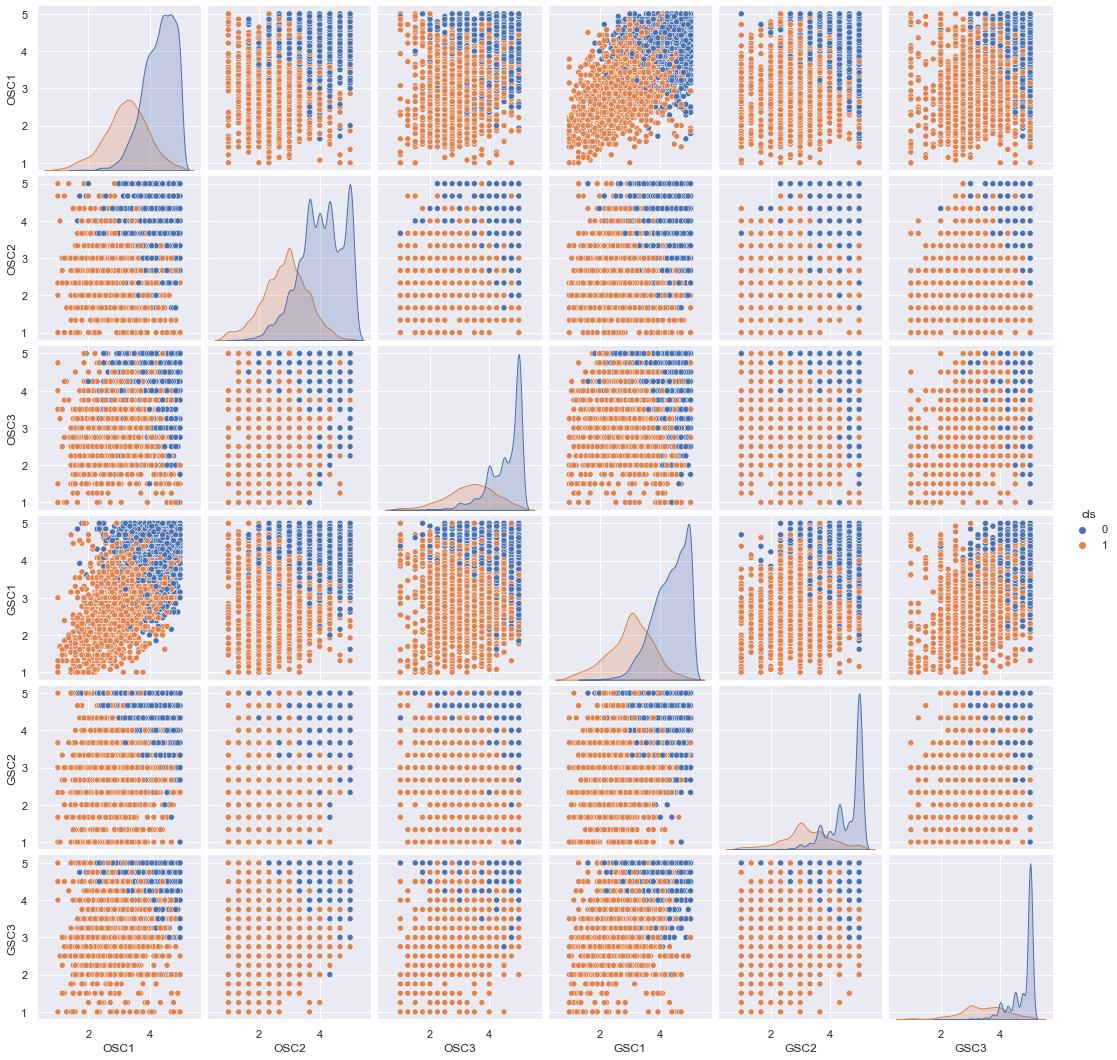

In [39]:
sb.pairplot(X, hue="cls")

In [116]:
X.groupby('cls').mean()

OSC1      OSC2      OSC3      GSC1      GSC2      GSC3       acc
cls                                                                      
0    4.302358  4.059674  4.538006  4.325787  4.590765  4.755256  0.278159
1    3.229125  2.858372  3.367273  3.029915  3.213224  3.426252  0.277387

In [117]:
X['SafClim'] = X[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']].mean(axis=1)
X.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  7075.000000  7075.000000  7075.000000  7075.000000  7075.000000   
mean      3.914629     3.625677     4.115053     3.857624     4.093098   
std       0.785477     0.922763     0.881243     0.884471     0.951236   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.428571     3.000000     3.500000     3.230769     3.333333   
50%       4.000000     3.666667     4.250000     4.000000     4.333333   
75%       4.571429     4.333333     5.000000     4.615385     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3          cls          acc      SafClim  
count  7075.000000  7075.000000  7075.000000  7075.000000  
mean      4.275124     0.361272     0.277880     3.980201  
std       0.862117     0.480403     0.447986     0.712750  
min       1.000000     0.000000     0.000000     1.222222  
25%       3.750000     0.000000     0.000000     3.504731  
50%       4.500000     0.000000     0.000000     4.099817  
75%       5.000000     1.000000     1.000000     4.557158  
max       5.000000     1.000000     1.000000     5.000000

In [118]:
X.groupby('cls').mean()

OSC1      OSC2      OSC3      GSC1      GSC2      GSC3       acc  \
cls                                                                         
0    4.302358  4.059674  4.538006  4.325787  4.590765  4.755256  0.278159   
1    3.229125  2.858372  3.367273  3.029915  3.213224  3.426252  0.277387   

      SafClim  
cls            
0    4.428641  
1    3.187360

In [121]:
X_cls_high = X.loc[X['cls'] == 0]
X_cls_high

OSC1      OSC2  OSC3      GSC1      GSC2  GSC3  cls  acc   SafClim
1     4.071429  4.333333  5.00  4.000000  4.333333  4.00    0    0  4.289683
4     4.785714  5.000000  2.50  4.538462  4.333333  5.00    0    0  4.359585
5     4.857143  3.000000  5.00  3.923077  4.333333  5.00    0    0  4.352259
6     4.500000  3.333333  4.25  4.307692  4.333333  4.50    0    0  4.204060
7     4.142857  4.000000  4.50  3.846154  4.000000  4.25    0    1  4.123168
...        ...       ...   ...       ...       ...   ...  ...  ...       ...
7066  4.714286  4.000000  5.00  4.923077  5.000000  5.00    0    0  4.772894
7067  5.000000  4.333333  5.00  4.846154  5.000000  5.00    0    0  4.863248
7069  4.428571  4.666667  3.75  4.307692  4.333333  3.50    0    0  4.164377
7072  3.214286  3.666667  4.75  3.230769  3.666667  4.75    0    0  3.879731
7074  4.500000  3.666667  4.50  4.153846  4.666667  5.00    0    0  4.414530

[4519 rows x 9 columns]

In [122]:
X_cls_low = X.loc[X['cls'] == 1]
X_cls_low

OSC1      OSC2  OSC3      GSC1      GSC2  GSC3  cls  acc   SafClim
0     3.071429  3.000000  3.75  3.307692  3.666667  3.00    1    0  3.299298
2     3.857143  3.333333  3.50  4.000000  3.666667  3.25    1    0  3.601190
3     3.142857  3.000000  3.00  3.461538  3.333333  3.75    1    0  3.281288
10    4.142857  1.333333  3.25  4.538462  3.666667  1.00    1    0  2.988553
14    3.642857  2.000000  4.00  3.769231  4.666667  4.25    1    0  3.721459
...        ...       ...   ...       ...       ...   ...  ...  ...       ...
7065  3.142857  1.333333  4.50  4.076923  4.000000  4.25    1    0  3.550519
7068  3.714286  3.333333  4.00  3.153846  5.000000  3.50    1    0  3.783578
7070  4.428571  3.000000  5.00  2.000000  1.666667  4.50    1    0  3.432540
7071  3.428571  2.666667  4.50  3.615385  3.000000  3.75    1    0  3.493437
7073  2.785714  3.000000  4.00  3.153846  4.333333  4.75    1    0  3.670482

[2556 rows x 9 columns]

In [123]:
from scipy import stats
stats.ttest_ind(X_cls_low, X_cls_high)

Ttest_indResult(statistic=array([-7.31741374e+01, -6.74081033e+01, -6.97203544e+01, -8.33333338e+01,
       -8.14514926e+01, -9.26853877e+01,             inf, -6.96553075e-02,
       -1.28456162e+02]), pvalue=array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.94446998, 0.        ]))

## DBSCAN

In [157]:
df = pd.read_csv('trucking factors only (wo TSF).csv')
X = df.copy()[['OSC1','OSC2','OSC3','GSC1','GSC2','GSC3']]
m = DBSCAN(eps=0.946, min_samples=230)
m.fit(X)
labels = m.labels_
#below is to export the labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clusters = [df[labels == i] for i in range(n_clusters_)]
for i in range (len (clusters)):
    clusters[i].to_csv("trucking factors only (wo TSF){}.csv".format(str(i)))
print("n_clusters_ = " + str(n_clusters_))
print(clusters)

n_clusters_ = 1
[      acc      OSC1      OSC2  OSC3      GSC1      GSC2  GSC3
0       0  3.071429  3.000000  3.75  3.307692  3.666667  3.00
1       0  4.071429  4.333333  5.00  4.000000  4.333333  4.00
2       0  3.857143  3.333333  3.50  4.000000  3.666667  3.25
3       0  3.142857  3.000000  3.00  3.461538  3.333333  3.75
5       0  4.857143  3.000000  5.00  3.923077  4.333333  5.00
...   ...       ...       ...   ...       ...       ...   ...
7067    0  5.000000  4.333333  5.00  4.846154  5.000000  5.00
7068    0  3.714286  3.333333  4.00  3.153846  5.000000  3.50
7071    0  3.428571  2.666667  4.50  3.615385  3.000000  3.75
7072    0  3.214286  3.666667  4.75  3.230769  3.666667  4.75
7074    0  4.500000  3.666667  4.50  4.153846  4.666667  5.00

[5121 rows x 7 columns]]


In [158]:
df_dbscan_cls = df.drop("acc", axis=1)
df_dbscan_cls['db_cls'] = labels.tolist()

In [159]:
df_dbscan_cls['db_cls'].value_counts()

 0    5121
-1    1954
Name: db_cls, dtype: int64

In [160]:
m_labels = m.fit_predict(X)
silhouette_score(X, m_labels)

0.2814465062940874

In [161]:
davies_bouldin_score(X, m_labels)

1.5987937227895737

In [163]:
df_dbscan_cls.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  7075.000000  7075.000000  7075.000000  7075.000000  7075.000000   
mean      3.914629     3.625677     4.115053     3.857624     4.093098   
std       0.785477     0.922763     0.881243     0.884471     0.951236   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.428571     3.000000     3.500000     3.230769     3.333333   
50%       4.000000     3.666667     4.250000     4.000000     4.333333   
75%       4.571429     4.333333     5.000000     4.615385     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3       db_cls  
count  7075.000000  7075.000000  
mean      4.275124    -0.276184  
std       0.862117     0.447140  
min       1.000000    -1.000000  
25%       3.750000    -1.000000  
50%       4.500000     0.000000  
75%       5.000000     0.000000  
max       5.000000     0.000000

In [165]:
X = df_dbscan_cls.drop('db_cls', axis=1)
y = df_dbscan_cls['db_cls']

In [167]:
y.describe()

count    7075.000000
mean       -0.276184
std         0.447140
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: db_cls, dtype: float64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
oversample = SMOTE(random_state=1919)
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [169]:
df_sm=X_train_sm
df_sm['db_cls']=y_train_sm
train_data = df_sm
df_sm.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  7184.000000  7184.000000  7184.000000  7184.000000  7184.000000   
mean      3.741186     3.388244     3.888959     3.633690     3.873041   
std       0.843129     0.978454     0.965686     0.958461     1.050050   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.142857     2.666667     3.250000     3.000000     3.000000   
50%       3.857143     3.333333     4.000000     3.716391     4.000000   
75%       4.428571     4.000000     4.750000     4.461538     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3       db_cls  
count  7184.000000  7184.000000  
mean      4.072956    -0.500000  
std       0.950649     0.500035  
min       1.000000    -1.000000  
25%       3.338600    -1.000000  
50%       4.250000    -0.500000  
75%       5.000000     0.000000  
max       5.000000     0.000000

In [170]:
df_test = X_test
df_test['db_cls'] = y_test
test_data = df_test
df_test.describe()

OSC1         OSC2         OSC3         GSC1         GSC2  \
count  2123.000000  2123.000000  2123.000000  2123.000000  2123.000000   
mean      3.906231     3.642644     4.099034     3.851516     4.098132   
std       0.799553     0.921008     0.893311     0.883873     0.946938   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.428571     3.000000     3.500000     3.307692     3.333333   
50%       4.000000     3.666667     4.250000     4.000000     4.333333   
75%       4.571429     4.333333     5.000000     4.615385     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GSC3       db_cls  
count  2123.000000  2123.000000  
mean      4.251884    -0.279793  
std       0.871178     0.449003  
min       1.000000    -1.000000  
25%       3.750000    -1.000000  
50%       4.500000     0.000000  
75%       5.000000     0.000000  
max       5.000000     0.000000

In [171]:
label = 'db_cls'
save_path = 'agModels-predictCluster_220803'  
predictor = TabularPredictor(label=label, path=save_path,eval_metric="f1").fit(train_data, presets='best_quality')

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictCluster_220803\"
AutoGluon Version:  0.5.1
Python Version:     3.8.5
Operating System:   Windows
Train Data Rows:    7184
Train Data Columns: 6
Label Column: db_cls
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, -1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 0, class 0 = -1
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (0) vs negative (-1) class.
	To explicitly set the positive_class, either rename classes to 1 and 0

		ray::_ray_fit() (pid=15044, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 623, in ray._raylet.execute_task
  File "c:\users\bdggym\.conda\envs\text_mining\lib\site-packages\ray\_private\memory_monitor.py", line 162, in raise_if_low_memory
    raise RayOutOfMemoryError(
ray._private.memory_monitor.RayOutOfMemoryError: More than 95% of the memory on node BDGCHJ-421NNB is used (7.4 / 7.78 GB). The top 10 memory consumers are:

PID	MEM	COMMAND
21152	0.52GiB	c:\users\bdggym\.conda\envs\text_mining\python.exe -m ipykernel_launcher -f C:\Users\bdggym\AppData\
1132	0.5GiB	C:\Program Files\Microsoft Office\root\Office16\OUTLOOK.EXE
24656	0.26GiB	c:\users\bdggym\.conda\envs\text_mining\python.exe c:\users\bdggym\.conda\envs\text_mining\lib\site-
20444	0.26GiB	c:\users\bdggym\.conda\envs\text_mining\python.exe c:\users\bdggym\.conda\envs\text_mining\lib\site-
8428	0.26GiB	c:\users\bdggym\.conda\envs\text_mining\python.exe c:\users\bdggym\.conda\envs\text_mining\lib\site-
18592	0.25GiB	C:\

In [172]:
# Libraries/Modules import conventions
import bokeh

results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L1   0.985568       0.446802   17.310819                0.446802          17.310819            1       True          3
1       WeightedEnsemble_L2   0.985568       0.458859   21.185052                0.012057           3.874233            2       True         12
2     NeuralNetTorch_BAG_L1   0.984641       0.146006   45.984612                0.146006          45.984612            1       True         10
3           CatBoost_BAG_L1   0.981991       0.133638  134.854122                0.133638         134.854122            1       True          6
4            XGBoost_BAG_L1   0.981438       0.135660   11.744117                0.135660          11.744117            1       True          9
5      LightGBMLarge_BAG_L1   0.981053       0.815841   19.021686         

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


In [173]:
predictor.evaluate(test_data)

Evaluation: f1 on test data: 0.9809084924292297
Evaluations on test data:
{
    "f1": 0.9809084924292297,
    "accuracy": 0.9726801695713613,
    "balanced_accuracy": 0.971253300389991,
    "mcc": 0.9331523630532151,
    "roc_auc": 0.9968708229009079,
    "precision": 0.9874088800530152,
    "recall": 0.9744931327665141
}


{'f1': 0.9809084924292297,
 'accuracy': 0.9726801695713613,
 'balanced_accuracy': 0.971253300389991,
 'mcc': 0.9331523630532151,
 'roc_auc': 0.9968708229009079,
 'precision': 0.9874088800530152,
 'recall': 0.9744931327665141}

In [174]:
predictor.predict_proba(test_data)

-1         0
1091  0.000050  0.999950
6217  0.824541  0.175459
4737  0.293163  0.706837
878   0.885080  0.114920
4382  0.021692  0.978308
...        ...       ...
6611  0.000380  0.999620
6791  0.084869  0.915131
7048  0.999991  0.000009
4466  0.000220  0.999780
1231  0.001249  0.998751

[2123 rows x 2 columns]

In [175]:
predictor.get_model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'XGBoost_BAG_L1',
 'NeuralNetTorch_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2']

In [179]:
predictor.feature_importance(test_data, num_shuffle_sets=100, subsample_size = 6000)

Computing feature importance via permutation shuffling for 6 features using 2123 rows with 100 shuffle sets...
	208.72s	= Expected runtime (2.09s per shuffle set)
	128.51s	= Actual runtime (Completed 100 of 100 shuffle sets)


importance    stddev        p_value    n  p99_high   p99_low
GSC3    0.126895  0.005756  2.243409e-135  100  0.128406  0.125383
OSC3    0.124735  0.006336  1.612924e-130  100  0.126400  0.123071
GSC2    0.109928  0.005809  8.012589e-129  100  0.111454  0.108402
GSC1    0.109890  0.005565  1.189815e-130  100  0.111352  0.108429
OSC2    0.091359  0.005193  1.075338e-125  100  0.092723  0.089995
OSC1    0.084711  0.005570  1.859701e-119  100  0.086174  0.083248